Assignment - 18
--------------------
Name : Nihar, Manjunath, Shiv, Bhoomika (EVA-2, 6:30 AM , Sunday)

Background :
The Purpose of this assignment is to perform image stabilization and alignment. This task is very much required for performing a facial recognition task. The modern networks are very good at recognizing faces, however the accuracy improves when the face is given in the image is stabilized and aligned properly. So for any face recognition task one of the important pre processing is Face alignment and stabilization .


Requirements
-------------
Implement the following:
This Assignment requires us to take a video of 5 seconds as the ground truth with a minimal translation/variance and outputs(take a 5 second video of your face with some translation and rotation (not extreme) a video with 3 different output which includes
1. Original frame
2. Aligned Frame with unstabilized points
3. Aligned Frame with stabilzed points

That means If the original video was 400x400 resolution, final video is 1200x400. Final video is 5 seconds and we need to see all 3 videos side by side for comparison. Upload to youtube, and embed the video in your readme file. 

We will use the following method to achieve this 
1. Use dlib Face Detector 
2. Align the face using 5-pt detector and align 
3. Calculate 68-pt landmark on the aligned faces
4. Calculate the optical flow for these 68-pts every frame
5. Stabilize the optical flow using LK method as we discussed. 

Environment
------------------
Development - Colab GPU , Jupyter Notebook Repository : Github

Models : 
1. 5 Point Landmark model
2. 68 Point landmark model


# Link Google Drive to Colab Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# import all the libraries to notebook

In [0]:
import cv2, dlib
import numpy as np
import math, sys
import matplotlib.pyplot as plt
%matplotlib inline

#Copy Contents to Current Working Directory

In [0]:
!cp -r '/content/drive/My Drive/EVA-18/models' /content
!cp -r '/content/drive/My Drive/EVA-18/videos' /content

!cp '/content/drive/My Drive/EVA-18/faceBlendCommon.py' /content

# Matplotlib Operations to resize image and change the scale

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# import os 

In [0]:
import os

# Function to save images to the specified directory in Google Drive

In [0]:
def save_all_images(path, filename, imageList):
  for cnt in range(0, len(imageList)):
    temp_fn = filename + '_' + str(cnt) + '.png'
    fn = os.path.join(path) + os.path.join(temp_fn)
    cv2.imwrite(fn, imageList[cnt])

# Read the Video file from Google Drive and convert that into images 

In [0]:
cap = cv2.VideoCapture('/content/videos/video_eva18.mp4')

all_frames = []
while(cap.isOpened()):
    ret, frame = cap.read()

    if frame is None:
      break

    all_frames.append(frame)
    #plt.imshow(frame)

cap.release()

# Display an image for testing

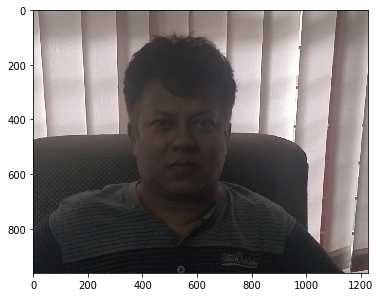

In [0]:
plt.imshow(all_frames[0][:,:,::-1])

# Create a directory names test inside the parent directory

In [0]:
directory = "test"
  
# Parent Directory path 
parent_dir = "/content/drive/My Drive/EVA-18/"
  
# Path 
path = os.path.join(parent_dir, directory) 
  
 
os.mkdir(path) 

# Make another diretcory for keeping the original images

In [0]:
os.mkdir('/content/drive/My Drive/EVA-18/test/original')

Save all images to the folder

In [0]:
save_all_images('/content/drive/My Drive/EVA-18/test/original/', 'frame', all_frames)

# Define path for the 5 point landmark model

In [0]:
MODEL_PATH = '/content/drive/My Drive/EVA-18/models/'
PREDICTOR_PATH = MODEL_PATH + "shape_predictor_5_face_landmarks.dat"

#define the object to detect front faces 

In [0]:
faceDetector = dlib.get_frontal_face_detector()

# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)


# Import user defined helper functions

In [0]:
import faceBlendCommon as fbc

# The foloowing functions takes an image and aligns using 5 point landmark

In [0]:
# get the aligned face
def get_aligned_face(im):
  # Detect faces in the image
  #print('image tensor is',im)
  faceRects = faceDetector(im, 0)
  print("Number of faces detected: ",len(faceRects))

  # Detect landmarks.
  points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
  print('length of points is', points)

  #len(points)

  points = np.array(points)
  print('after np array',len(points))
  # Convert image to floating point in the range 0 to 1
  im = np.float32(im)/255.0

  # Dimensions of output image
  h = 600
  w = 600

  # Normalize image to output coordinates.
  if len(points) > 0:
    imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

    imNorm = np.uint8(imNorm*255)
    return imNorm
  else:
    return im 

# Calls the Alignment method to align each image

In [0]:
all_aligned_faces = []

print('Aligning all frames... ')
# process one frame at a time. 
for cnt in range(0, len(all_frames)):
  frame = all_frames[cnt]
  aligned_face = get_aligned_face(frame)
  all_aligned_faces.append(aligned_face)

print('Done!')

Aligning all frames... 
Number of faces detected:  1
length of points is [(640, 427), (586, 427), (460, 429), (510, 428), (544, 521)]
after np array 5
Number of faces detected:  1
length of points is [(641, 425), (586, 426), (459, 427), (509, 427), (543, 522)]
after np array 5
Number of faces detected:  1
length of points is [(649, 422), (588, 423), (441, 420), (501, 421), (544, 528)]
after np array 5
Number of faces detected:  1
length of points is [(649, 422), (588, 423), (442, 420), (502, 422), (545, 530)]
after np array 5
Number of faces detected:  1
length of points is [(639, 427), (585, 428), (459, 429), (509, 428), (543, 522)]
after np array 5
Number of faces detected:  1
length of points is [(639, 427), (585, 428), (459, 429), (509, 428), (543, 522)]
after np array 5
Number of faces detected:  1
length of points is [(650, 424), (590, 425), (443, 423), (503, 424), (545, 530)]
after np array 5
Number of faces detected:  1
length of points is [(651, 425), (590, 426), (445, 424), (

# Let's display one original image for testing 

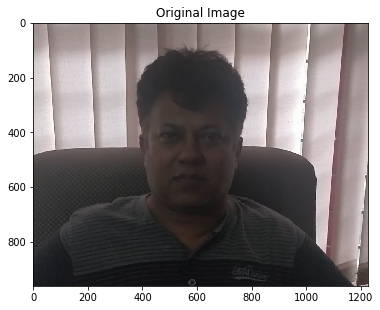

In [0]:
plt.imshow(all_frames[50][:,:,::-1])
plt.title("Original Image")
plt.show()

# Display the aligne image

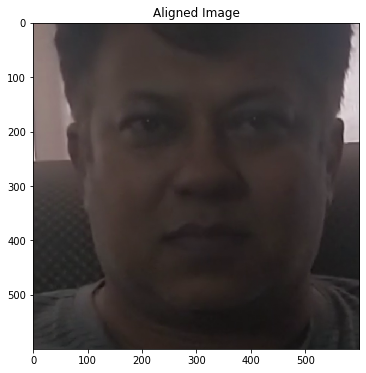

In [0]:
plt.imshow(all_aligned_faces[50][:,:,::-1])
plt.title("Aligned Image")
plt.show()

# Make a directory for saving the aligned images 

In [0]:
os.mkdir('/content/drive/My Drive/EVA-18/test/aligned_face')

# Save all aligned images to folder in gdrive

In [0]:
save_all_images('/content/drive/My Drive/EVA-18/test/aligned_face/', 'align_face', all_aligned_faces)

# Load the 68 point landmark detector

In [0]:
MODEL_PATH = '/content/drive/My Drive/EVA-18/models/'
PREDICTOR_PATH_2 = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

# Create an object for the frontal face method /class

In [0]:
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH_2)

# function to reder the face 

In [0]:
def renderFace2(im, landmarks, color=(200, 0, 0), radius=3):
  for p in landmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)

# method to get landmark aligned face

In [0]:
# get the aligned face
def get_landmarks_aligned_face(im):
  # Detect faces in the image
  #print('image tensor is',im)
  faceRects = faceDetector(im, 0)
  for i in range(0, len(faceRects)):
    newRect = dlib.rectangle(int(faceRects[i].left()),
                            int(faceRects[i].top()),
                            int(faceRects[i].right()),
                            int(faceRects[i].bottom()))
    # For every face rectangle, run landmarkDetector
    landmarks = landmarkDetector(im, newRect)
    # Print number of landmarks
    if i==0:
      print("Number of landmarks",len(landmarks.parts()))
      renderFace2(im, landmarks,color=(200,0,0),radius=3)

 
 
 

# calls the method which gives the 68 landmark points on the face

In [0]:
all_landmark_faces = []

for cnt in range(0, len(all_aligned_faces)):
  frame = all_aligned_faces[cnt]
  landmark_face = get_landmarks_aligned_face(frame)
  all_landmark_faces.append(landmark_face)

print('Done!')

Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68
Number of landmarks 68


RuntimeError: ignored

# Let's display the landmarks on the unstabilized image 

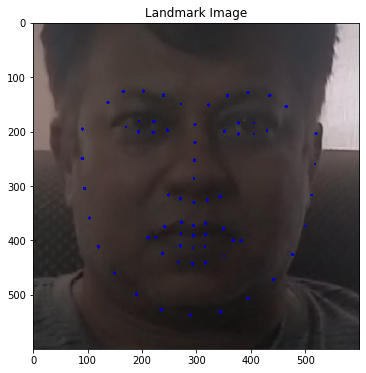

In [0]:
plt.imshow(all_landmark_faces[1][:,:,::-1])
plt.title("Landmark Image")
plt.show()


# create a directory for storing these images

In [0]:
os.mkdir('/content/drive/My Drive/EVA-18/test/landmark_faces')

# save all images to the folder 

In [0]:
save_all_images('/content/drive/My Drive/EVA-18/test/landmark_faces/','landmarks',all_landmark_faces)

# This method converts frames to videos 

In [0]:
from os.path import isfile, join
 
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    # files.sort(key = lambda x: float(x[5:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()
 

pathIn= '/content/drive/My Drive/EVA-18/test/aligned_face/'
pathOut = '/content/drive/My Drive/EVA-18/videos/align.mp4'
fps = 10.0
convert_frames_to_video(pathIn, pathOut, fps)

/content/drive/My Drive/EVA-18/test/aligned_face/align_face_0.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_1.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_2.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_3.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_4.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_5.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_6.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_7.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_8.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_9.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_10.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_11.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_12.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_13.png
/content/drive/My Drive/EVA-18/test/aligned_face/align_face_14.png
/cont

# resize the images which can be used to stabilize the faces later

In [0]:
MODEL_PATH = '/content/drive/My Drive/EVA-18/models/'
PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"
RESIZE_HEIGHT = 480
NUM_FRAMES_FOR_FPS = 100
SKIP_FRAMES = 1

# method to calculate and return the distnace between the eyes for stabilization

In [0]:
def interEyeDistance(predict):
  leftEyeLeftCorner = (predict[36].x, predict[36].y)
  rightEyeRightCorner = (predict[45].x, predict[45].y)
  distance = cv2.norm(np.array(rightEyeRightCorner) - np.array(leftEyeLeftCorner))
  distance = int(distance)
  return distance

In [0]:
winName = "Stabilized facial landmark detector"

In [0]:
videoFileName = "/content/drive/My Drive/EVA-18/videos/align.mp4"

# Initializing video capture object.
cap = cv2.VideoCapture(videoFileName)

if(cap.isOpened()==False):
  print("Unable to load video")

In [0]:

import math
from google.colab.patches import cv2_imshow

# define parameters

In [0]:
winSize = 101
maxLevel = 10
fps = 30.0
# Grab a frame
ret,imPrev = cap.read()

In [0]:
size = imPrev.shape[0:1]

In [0]:

print(size)
print(imPrev.shape)

(600,)
(600, 600, 3)


# create objects for landmark detector 

In [0]:
detector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# declare variables to capture stabilization points 

In [0]:
points=[]
pointsPrev=[]
pointsDetectedCur=[]
pointsDetectedPrev=[]

In [0]:
eyeDistanceNotCalculated = True
eyeDistance = 0
isFirstFrame = True
# Initial value, actual value calculated after 100 frames
fps = 10
showStabilized = False
count =0

In [0]:
all_stabilized_frames = []

# The following lines of code calculates 
1. converts BGR to RGB followed by gray scale
2. optical flow for each pixel in the image 
3. Stabilize the optical flow using LK method
4. resize the image
5. Align the face using stabilized points 


In [0]:
while(True):
  if (count==0):
    t = cv2.getTickCount()

  # Grab a frame
  ret,im = cap.read()
  if im is None:
    break
    
  imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # COnverting to grayscale
  imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  imGrayPrev = imGray
  height = im.shape[0]
  IMAGE_RESIZE = float(height)/RESIZE_HEIGHT
  # Resize image for faster face detection
  imSmall = cv2.resize(im, None, fx=1.0/IMAGE_RESIZE, fy=1.0/IMAGE_RESIZE,interpolation = cv2.INTER_LINEAR)
  imSmallDlib = cv2.cvtColor(imSmall, cv2.COLOR_BGR2RGB)
  # Skipping the frames for faster processing
  if (count % SKIP_FRAMES == 0):
    faces = detector(imSmallDlib,0)

  # If no face was detected
  if len(faces)==0:
    print("No face detected")
else:
    for i in range(0,len(faces)):
      print("face detected")
      # Face detector was found over a smaller image.
      # So, we scale face rectangle to correct size.
      newRect = dlib.rectangle(int(faces[i].left() * IMAGE_RESIZE),
        int(faces[i].top() * IMAGE_RESIZE),
        int(faces[i].right() * IMAGE_RESIZE),
        int(faces[i].bottom() * IMAGE_RESIZE))
      
      # Detect landmarks in current frame
      landmarks = landmarkDetector(imDlib, newRect).parts()
      
      # Handling the first frame of video differently,for the first frame copy the current frame points
      
      if (isFirstFrame==True):
        pointsPrev=[]
        pointsDetectedPrev = []
        [pointsPrev.append((p.x, p.y)) for p in landmarks]
        [pointsDetectedPrev.append((p.x, p.y)) for p in landmarks]

      # If not the first frame, copy points from previous frame.
      else:
        pointsPrev=[]
        pointsDetectedPrev = []
        pointsPrev = points
        pointsDetectedPrev = pointsDetectedCur
      # pointsDetectedCur stores results returned by the facial landmark detector
      # points stores the stabilized landmark points
      points = []
      pointsDetectedCur = []
      [points.append((p.x, p.y)) for p in landmarks]
      [pointsDetectedCur.append((p.x, p.y)) for p in landmarks]

      # Convert to numpy float array
      pointsArr = np.array(points,np.float32)
      pointsPrevArr = np.array(pointsPrev,np.float32)

      # If eye distance is not calculated before
      if eyeDistanceNotCalculated:
        eyeDistance = interEyeDistance(landmarks)
        print(eyeDistance)
        eyeDistanceNotCalculated = False

      if eyeDistance > 100:
          dotRadius = 3
      else:
        dotRadius = 2

      print(eyeDistance)
      sigma = eyeDistance * eyeDistance / 400
      s = 2*int(eyeDistance/4)+1

      #  Set up optical flow params
      lk_params = dict(winSize  = (s, s), maxLevel = 5, criteria = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 20, 0.03))
      pointsArr,status, err = cv2.calcOpticalFlowPyrLK(imGrayPrev,imGray,pointsPrevArr,pointsArr,**lk_params)
      

      # Converting to float
      pointsArrFloat = np.array(pointsArr,np.float32)

      # Converting back to list
      points = pointsArrFloat.tolist()

      # Final landmark points are a weighted average of
      # detected landmarks and tracked landmarks
      for k in range(0,len(landmarks)):
        d = cv2.norm(np.array(pointsDetectedPrev[k]) - np.array(pointsDetectedCur[k]))
        alpha = math.exp(-d*d/sigma)
        points[k] = (1 - alpha) * np.array(pointsDetectedCur[k]) + alpha * np.array(points[k])

      # Drawing over the stabilized landmark points
      if showStabilized is True:
        for p in points:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (255,0,0),-1)
      else:
        for p in pointsDetectedCur:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (0,0,255),-1)

      isFirstFrame = False
      count = count+1
      if ( count == NUM_FRAMES_FOR_FPS):
        t = (cv2.getTickCount()-t)/cv2.getTickFrequency()
        fps = NUM_FRAMES_FOR_FPS/t
        count = 0
        isFirstFrame = True

      # Display the landmarks points
      cv2.putText(im, "{:.1f}-fps".format(fps), (50, size[0]-50), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 0, 255), 3,cv2.LINE_AA)
      #cv2.imshow(winName, im)
      #cv2_imshow(im)
      # key = cv2.waitKey(25) & 0xFF

      # # Use spacebar to toggle between Stabilized and Unstabilized version.
      # if key==32:
      #   showStabilized = not showStabilized

      # # Stop the program.
      # if key==27:
      #   sys.exit()

      all_stabilized_frames.append(im)

      # Getting ready for next frame
      imPrev = im
      imGrayPrev = imGray

# cv2.destroyAllwindows()
cap.release()

No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
face detected
234
234
face detected
234
face detected
234
face detected
234
No face detected
No face detected
face detected
234
No face detected
face detected
234
No face detected
No face detected
face detected
234
face detected
234
face detected
234
face detected
234
face detected
234
face detected
234
face detected
234
No face detected
face detected
234
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
face detected
234
face detected
234
face detected
234
face detected
234
face detected
234
face detected
234
face detected
234
face detected
234
No face detected
face detected
234
No face detected
face detected
234
No face detected
face detected
234
face detected
234
face detected
234
face detected
234

# Display one of the stabilized and aligned image 

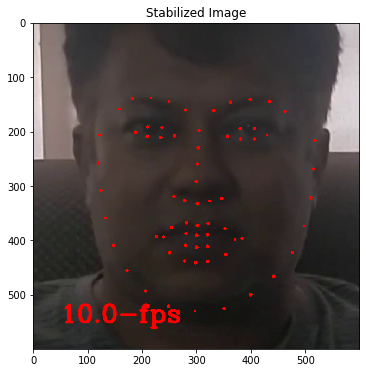

In [0]:
plt.imshow(all_stabilized_frames[17][:,:,::-1])
plt.title("Stabilized Image")
plt.show()

# save the stabilized and aligned images to gdrive

In [0]:
all_stabilized_frames.insert(0, all_stabilized_frames[0])

In [0]:
os.mkdir('/content/drive/My Drive/EVA-18/test/stablize')

In [0]:
save_all_images('/content/drive/My Drive/EVA-18/test/stablize/', 'stablize_face', all_stabilized_frames)

In [0]:

pathIn= '/content/drive/My Drive/EVA-18/test/stablize/'
pathOut = '/content/drive/My Drive/EVA-18/videos/stable.mp4'
fps = 10.0
convert_frames_to_video(pathIn, pathOut, fps)

/content/drive/My Drive/EVA-18/test/stablize/stablize_face_0.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_1.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_2.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_3.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_4.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_5.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_6.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_7.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_8.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_9.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_10.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_11.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_12.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_13.png
/content/drive/My Drive/EVA-18/test/stablize/stablize_face_14.png
/content/drive/My Dr

# Create a kist if images

In [0]:
def read_all_images(dir, filename_prefix, num_files):
  result_list = []
  for cnt in range(0, num_files):
    fn = filename_prefix + '_' + str(cnt) + '.png'
    full_path = os.path.join(dir, fn)
    img = cv2.imread(full_path)
    result_list.append(img)

  return result_list

# Create variables to each of the 
1. Original Image
2. Aligned unstabilized image
3. Aligned stabilized image


In [0]:
original_frames = read_all_images('/content/drive/My Drive/EVA-18/test/original', 'frame', 114)

In [0]:
aligned_frames = read_all_images('/content/drive/My Drive/EVA-18/test/aligned_face', 'align_face', 114)

In [0]:
stable_frames = read_all_images('/content/drive/My Drive/EVA-18/test/stablize', 'stablize_face', 114)

In [0]:
print(original_frames[0].shape)
print(aligned_frames[0].shape)
print(stable_frames[0].shape)

(962, 1226, 3)
(600, 600, 3)
(600, 600, 3)


# Resize the images 

In [0]:
def resize_images(imageList, width, height):
  result_list = []
  for cnt in range(0, len(imageList)):
    new_img = cv2.resize(imageList[cnt], (width, height), interpolation=cv2.INTER_AREA)
    result_list.append(new_img)
  return result_list

In [0]:
orig_frames_resized = resize_images(original_frames, 600, 600)

In [0]:

orig_frames_resized[0].shape

(600, 600, 3)

In [0]:
aligned_frames_resized=resize_images(aligned_frames,600,600)

In [0]:
np.shape(orig_frames_resized)

(114, 600, 600, 3)

In [0]:
np.shape(aligned_frames_resized)

(114, 600, 600, 3)

In [0]:
np.shape(stable_frames)

(114, 600, 600, 3)

In [0]:
stable_frames_resized=resize_images(stable_frames,600,600)

# Concatenate all the images side by side 
1. Now the size of each image is 1200x400 ( 3 * 400 x 400 )
2. Convert the images int video

In [0]:
new_frames = []
for cnt in range(0, len(orig_frames_resized)):
  new_img = np.hstack((orig_frames_resized[cnt], aligned_frames_resized[cnt], stable_frames[cnt]))
  new_frames.append(new_img)

# Display one of the images 

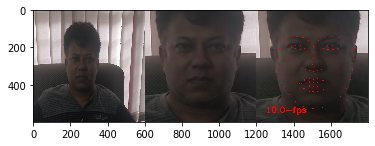

In [0]:

plt.imshow(new_frames[27][:,:,::-1])

# Save it to drive

In [0]:
os.mkdir('/content/drive/My Drive/EVA-18/test/final/')

In [0]:
save_all_images('/content/drive/My Drive/EVA-18/test/final/', 'final', new_frames)

# Convert to video file 

In [0]:
from os.path import isfile, join
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    # files.sort(key = lambda x: int(x[5:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

pathIn= '/content/drive/My Drive/EVA-18/test/final/'
pathOut = '/content/drive/My Drive/EVA-18/videos/finalvid.mp4'
fps = 30.0
convert_frames_to_video(pathIn, pathOut, fps)

/content/drive/My Drive/EVA-18/test/final/final_0.png
/content/drive/My Drive/EVA-18/test/final/final_1.png
/content/drive/My Drive/EVA-18/test/final/final_2.png
/content/drive/My Drive/EVA-18/test/final/final_3.png
/content/drive/My Drive/EVA-18/test/final/final_4.png
/content/drive/My Drive/EVA-18/test/final/final_5.png
/content/drive/My Drive/EVA-18/test/final/final_6.png
/content/drive/My Drive/EVA-18/test/final/final_7.png
/content/drive/My Drive/EVA-18/test/final/final_8.png
/content/drive/My Drive/EVA-18/test/final/final_9.png
/content/drive/My Drive/EVA-18/test/final/final_10.png
/content/drive/My Drive/EVA-18/test/final/final_11.png
/content/drive/My Drive/EVA-18/test/final/final_12.png
/content/drive/My Drive/EVA-18/test/final/final_13.png
/content/drive/My Drive/EVA-18/test/final/final_14.png
/content/drive/My Drive/EVA-18/test/final/final_15.png
/content/drive/My Drive/EVA-18/test/final/final_16.png
/content/drive/My Drive/EVA-18/test/final/final_17.png
/content/drive/My Dr

Summary
--------

The converted video is uploaded to youtube. Please see the link under readme 